# **Data analysis / Statistical Testing**


In [109]:
#IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import string
import spacy

from collections import Counter

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import spacy
from collections import Counter
import re
from spacy.lang.en.stop_words import STOP_WORDS

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GGPC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## **Initialization / Cleaning**

In [110]:
df_clean = pd.read_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_3\data\raw\Clean.csv')
text_features = pd.read_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_3\data\raw\text_features.csv')
title_features = pd.read_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_3\data\raw\title_features.csv')


In [111]:
df_clean.head()

,Unnamed: 0,title,text,subject,date,label,clean_title,clean_text
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,budget fight loom republican flip fiscal script,washington head conservative republican factio...
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,military accept transgender recruit monday pen...,washington transgender people allowed first ti...
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,senior republican senator mueller job,washington special counsel investigation link ...
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,fbi russia probe helped australian diplomat nyt,washington trump campaign adviser george papad...
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,trump want postal service charge amazon shipment,president donald trump called postal service f...


In [112]:
text_features.head()

,Unnamed: 0,char_count,word_count,word_density,adj_count,adv_count,noun_count,pron_count,propn_count,verb_count
0,0,3185.0,426.0,7.476526,53.0,17.0,162.0,0.0,99.0,82.0
1,1,2829.0,353.0,8.014164,35.0,7.0,132.0,1.0,71.0,92.0
2,2,1898.0,255.0,7.443137,27.0,3.0,97.0,3.0,62.0,50.0
3,3,1687.0,218.0,7.738532,25.0,8.0,71.0,0.0,63.0,43.0
4,4,3451.0,471.0,7.326964,72.0,16.0,218.0,0.0,69.0,75.0


In [113]:
title_features.head()

,Unnamed: 0,char_count,word_count,word_density,adj_count,adv_count,noun_count,pron_count,propn_count,verb_count
0,0,47.0,7.0,6.714286,2.0,0.0,4.0,0.0,1.0,0.0
1,1,51.0,6.0,8.500000,0.0,0.0,3.0,0.0,2.0,1.0
2,2,37.0,5.0,7.400000,2.0,0.0,3.0,0.0,0.0,0.0
3,3,47.0,7.0,6.714286,1.0,0.0,3.0,0.0,2.0,1.0
4,4,48.0,7.0,6.857143,1.0,0.0,5.0,0.0,0.0,1.0


In [114]:
text_features = pd.concat([text_features, df_clean['label']], axis=1)
title_features = pd.concat([title_features, df_clean['label']], axis=1)

In [115]:
text_features

,Unnamed: 0,char_count,word_count,word_density,adj_count,adv_count,noun_count,pron_count,propn_count,verb_count,label
0,0,3185.0,426.0,7.476526,53.0,17.0,162.0,0.0,99.0,82.0,1
1,1,2829.0,353.0,8.014164,35.0,7.0,132.0,1.0,71.0,92.0,1
2,2,1898.0,255.0,7.443137,27.0,3.0,97.0,3.0,62.0,50.0,1
3,3,1687.0,218.0,7.738532,25.0,8.0,71.0,0.0,63.0,43.0,1
4,4,3451.0,471.0,7.326964,72.0,16.0,218.0,0.0,69.0,75.0,1
...,...,...,...,...,...,...,...,...,...,...,...
44684,44893,2091.0,288.0,7.260417,53.0,13.0,98.0,1.0,67.0,44.0,0
44685,44894,1010.0,149.0,6.778523,12.0,4.0,66.0,1.0,25.0,34.0,0
44686,44895,15685.0,2194.0,7.149043,357.0,119.0,698.0,17.0,515.0,364.0,0
44687,44896,1642.0,247.0,6.647773,34.0,6.0,78.0,7.0,59.0,48.0,0


In [116]:
title_features

,Unnamed: 0,char_count,word_count,word_density,adj_count,adv_count,noun_count,pron_count,propn_count,verb_count,label
0,0,47.0,7.0,6.714286,2.0,0.0,4.0,0.0,1.0,0.0,1
1,1,51.0,6.0,8.500000,0.0,0.0,3.0,0.0,2.0,1.0,1
2,2,37.0,5.0,7.400000,2.0,0.0,3.0,0.0,0.0,0.0,1
3,3,47.0,7.0,6.714286,1.0,0.0,3.0,0.0,2.0,1.0,1
4,4,48.0,7.0,6.857143,1.0,0.0,5.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
44684,44893,53.0,9.0,5.888889,0.0,1.0,1.0,0.0,6.0,1.0,0
44685,44894,40.0,6.0,6.666667,0.0,0.0,3.0,0.0,2.0,1.0,0
44686,44895,71.0,11.0,6.454545,3.0,0.0,3.0,0.0,3.0,2.0,0
44687,44896,50.0,8.0,6.250000,0.0,1.0,1.0,0.0,3.0,2.0,0


In [117]:
text_features = text_features.drop(columns=['Unnamed: 0'])
title_features = title_features.drop(columns=['Unnamed: 0'])
df_clean = df_clean.drop(columns=['Unnamed: 0'])

In [118]:
text_features['labelE'] = text_features['label'].map({1: 'Human', 0: 'AI'})
title_features['labelE'] = title_features['label'].map({1: 'Human', 0: 'AI'})
df_clean['labelE'] = df_clean['label'].map({1: 'Human', 0: 'AI'})

In [119]:
print(text_features.dtypes)


char_count      float64
word_count      float64
word_density    float64
adj_count       float64
adv_count       float64
noun_count      float64
pron_count      float64
propn_count     float64
verb_count      float64
label             int64
labelE           object
dtype: object


**Text Features Dist**

In [120]:
df_clean['labelE']

0        Human
1        Human
2        Human
3        Human
4        Human
         ...  
44684       AI
44685       AI
44686       AI
44687       AI
44688       AI
Name: labelE, Length: 44689, dtype: object

too many errors in the date column - decided to drop as this is not significant when text classification.

In [121]:

# df_clean['date'] = df_clean['date'].astype(str)

# # Extract the month and year from the 'date' column using a more robust regex to handle abbreviations
# df_clean['month_year'] = df_clean['date'].str.extract(r'([A-Za-z]{3,9}\s\d{1,2},\s\d{4})')

# # Print a sample of the DataFrame to check the 'month_year' extraction
# print(df_clean[['date', 'month_year']].head(20))

# # Convert the extracted month and year to datetime
# df_clean['month_year'] = pd.to_datetime(df_clean['month_year'], format='%B %d, %Y', errors='coerce')

# df_clean['month_year'].isnull().sum()

In [122]:
df_clean = df_clean.drop(columns=['date'])
df_clean = df_clean.dropna(subset=['clean_text'])
df_clean = df_clean.copy()

In [123]:
df_clean.to_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_3\data\raw\Clean_columns.csv')

In [124]:
df_clean

,title,text,subject,label,clean_title,clean_text,labelE
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,budget fight loom republican flip fiscal script,washington head conservative republican factio...,Human
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,military accept transgender recruit monday pen...,washington transgender people allowed first ti...,Human
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,senior republican senator mueller job,washington special counsel investigation link ...,Human
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,fbi russia probe helped australian diplomat nyt,washington trump campaign adviser george papad...,Human
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,trump want postal service charge amazon shipment,president donald trump called postal service f...,Human
...,...,...,...,...,...,...,...
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,mcpain john mccain furious iran treated u sail...,century wire say reported earlier week unlikel...,AI
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,justice yahoo settle privacy lawyer user,century wire say familiar theme whenever dispu...,AI
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,sunnistan u allied safe zone plan take territo...,patrick henningsen century wireremember obama ...,AI
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,blow million al jazeera america finally call q...,century wire say al jazeera america go history...,AI


## **EDA**

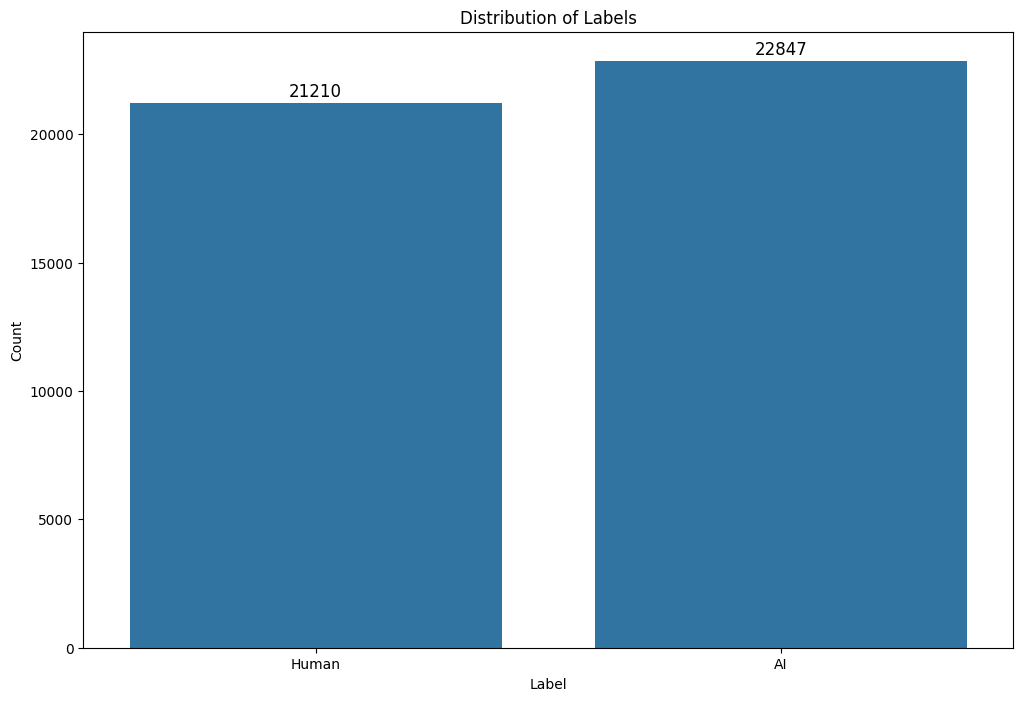

In [125]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df_clean, x='labelE')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

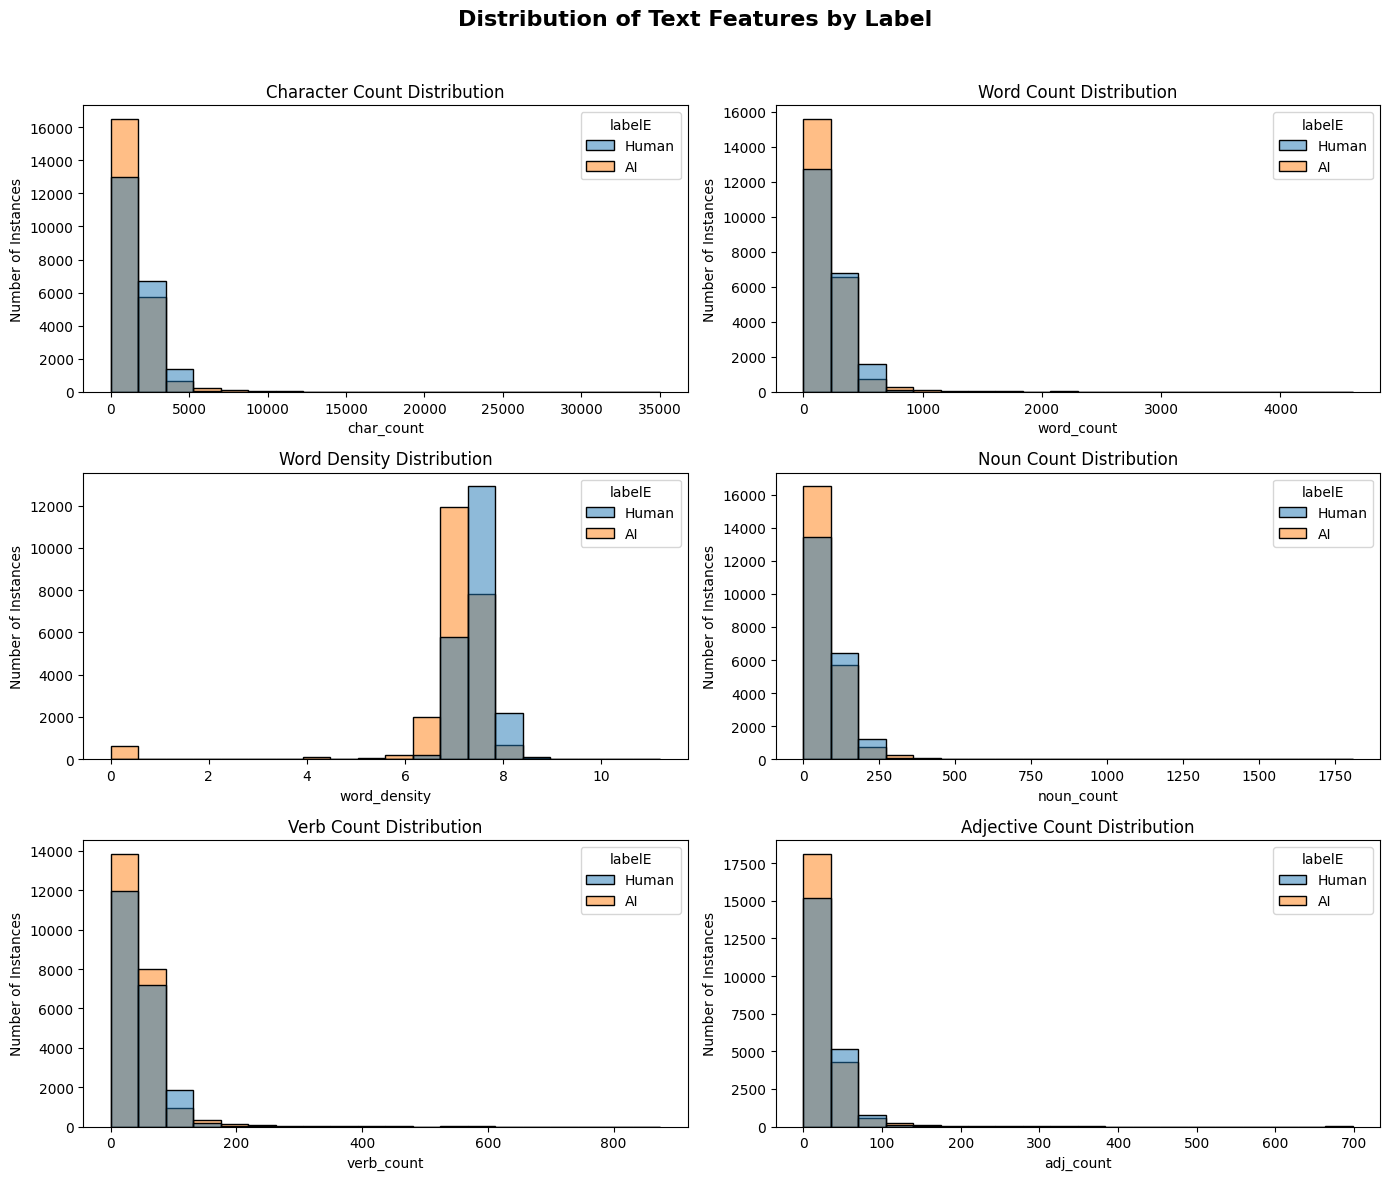

In [126]:
# Plot distribution of text features
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

sns.histplot(ax=axes[0, 0], data=text_features, x='char_count', hue='labelE', bins=20)
axes[0, 0].set_title('Character Count Distribution')
axes[0, 0].set_ylabel('Number of Instances')

sns.histplot(ax=axes[0, 1], data=text_features, x='word_count', hue='labelE', bins=20)
axes[0, 1].set_title('Word Count Distribution')
axes[0, 1].set_ylabel('Number of Instances')

sns.histplot(ax=axes[1, 0], data=text_features, x='word_density', hue='labelE', bins=20)
axes[1, 0].set_title('Word Density Distribution')
axes[1, 0].set_ylabel('Number of Instances')

sns.histplot(ax=axes[1, 1], data=text_features, x='noun_count', hue='labelE', bins=20)
axes[1, 1].set_title('Noun Count Distribution')
axes[1, 1].set_ylabel('Number of Instances')

sns.histplot(ax=axes[2, 0], data=text_features, x='verb_count', hue='labelE', bins=20)
axes[2, 0].set_title('Verb Count Distribution')
axes[2, 0].set_ylabel('Number of Instances')

sns.histplot(ax=axes[2, 1], data=text_features, x='adj_count', hue='labelE', bins=20)
axes[2, 1].set_title('Adjective Count Distribution')
axes[2, 1].set_ylabel('Number of Instances')

fig.suptitle('Distribution of Text Features by Label', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


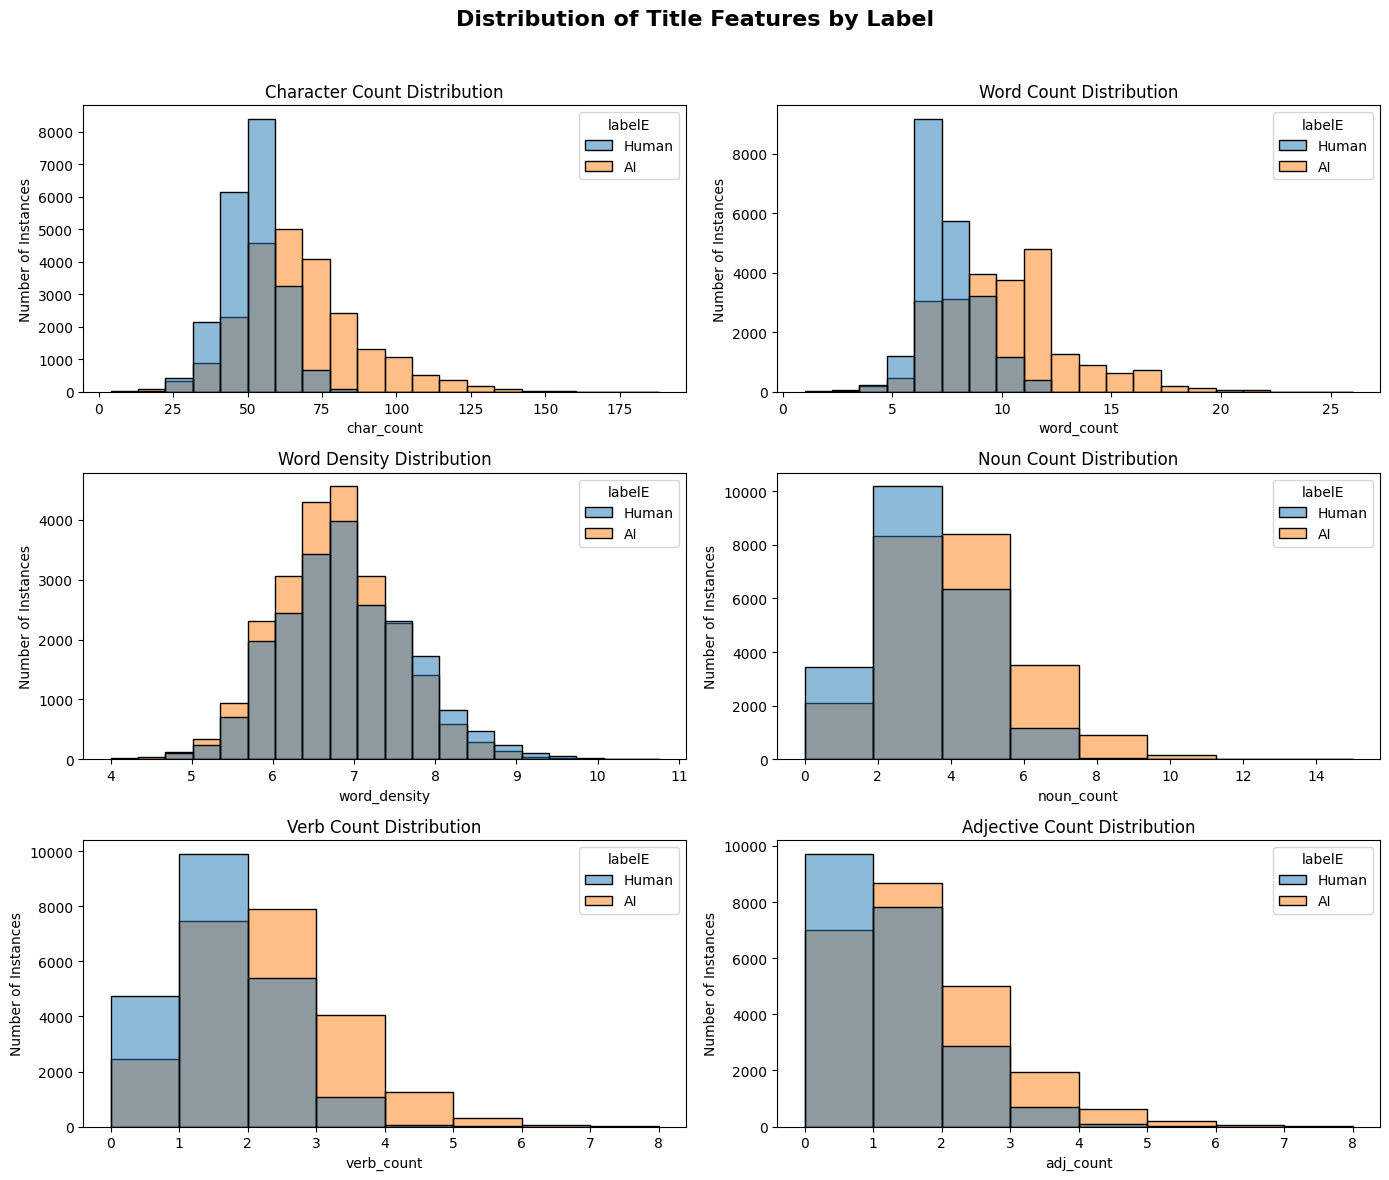

In [127]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

sns.histplot(ax=axes[0, 0], data=title_features, x='char_count', hue='labelE', bins=20)
axes[0, 0].set_title('Character Count Distribution')
axes[0, 0].set_ylabel('Number of Instances')

sns.histplot(ax=axes[0, 1], data=title_features, x='word_count', hue='labelE', bins=20)
axes[0, 1].set_title('Word Count Distribution')
axes[0, 1].set_ylabel('Number of Instances')

sns.histplot(ax=axes[1, 0], data=title_features, x='word_density', hue='labelE', bins=20)
axes[1, 0].set_title('Word Density Distribution')
axes[1, 0].set_ylabel('Number of Instances')

sns.histplot(ax=axes[1, 1], data=title_features, x='noun_count', hue='labelE', bins=8)
axes[1, 1].set_title('Noun Count Distribution')
axes[1, 1].set_ylabel('Number of Instances')

sns.histplot(ax=axes[2, 0], data=title_features, x='verb_count', hue='labelE', bins=8)
axes[2, 0].set_title('Verb Count Distribution')
axes[2, 0].set_ylabel('Number of Instances')

sns.histplot(ax=axes[2, 1], data=title_features, x='adj_count', hue='labelE', bins=8)
axes[2, 1].set_title('Adjective Count Distribution')
axes[2, 1].set_ylabel('Number of Instances')

fig.suptitle('Distribution of Title Features by Label', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


`Noun Count Distribution`
Interpretation: Human-generated text may use more specific and varied nouns, contributing to the richness of the content.

`Verb Count Distribution`
Interpretation: Human text might be more action-oriented and descriptive, using verbs to convey more dynamic content.

`Adjective Count Distribution`
Interpretation: The use of adjectives in human text suggests a tendency to provide more descriptive and nuanced information.

`Character Count Distribution`
Interpretation: human-generated text is generally longer and more detailed than AI-generated text.

`Word Count Distribution`
Interpretation: Human text may be using more words per sentence, possibly indicating more complex sentence structures.


In [128]:
df_clean['clean_text'] = df_clean['clean_text'].astype(str)
df_clean['clean_title'] = df_clean['clean_title'].astype(str)

In [129]:
true_text_words = ' '.join(df_clean[df_clean['label'] == 1]['clean_text'])
fake_text_words = ' '.join(df_clean[df_clean['label'] == 0]['clean_text'])

true_title_words = ' '.join(df_clean[df_clean['label'] == 1]['clean_title'])
fake_title_words = ' '.join(df_clean[df_clean['label'] == 0]['clean_title'])

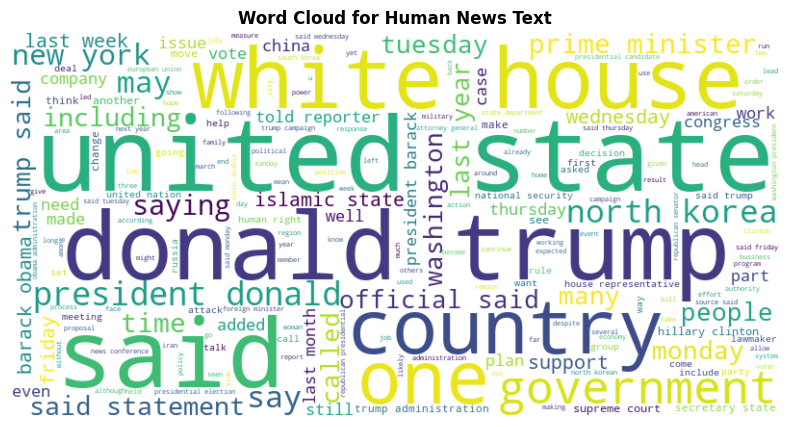

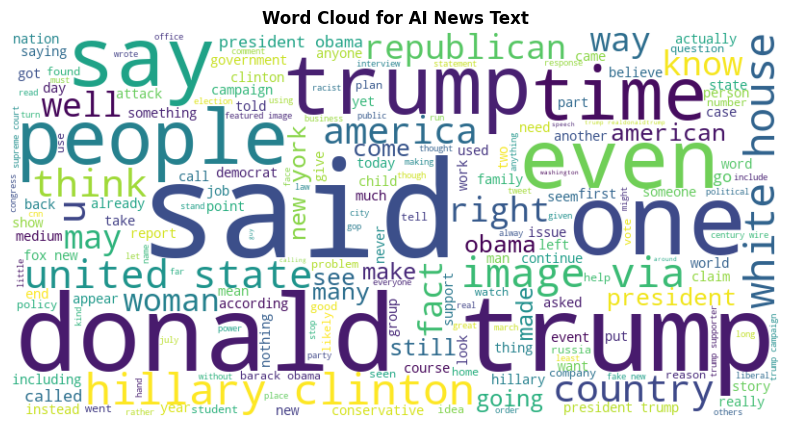

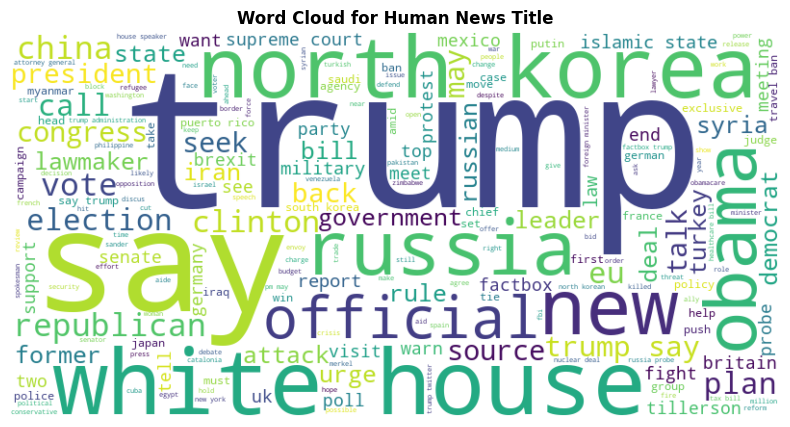

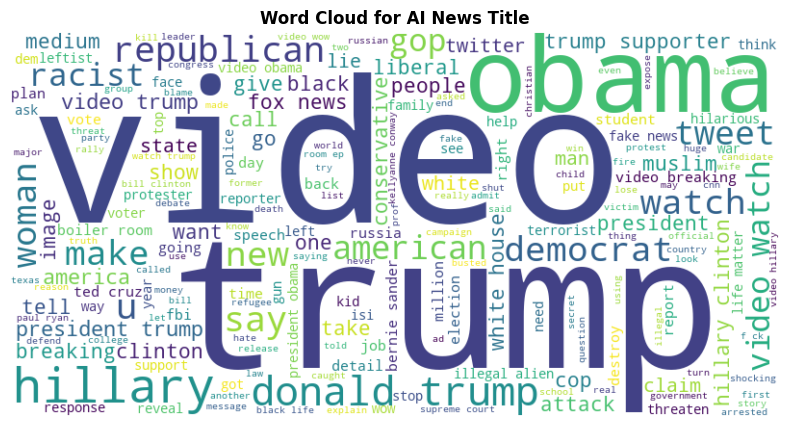

In [130]:
true_text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text_words)
fake_text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text_words)

true_title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_title_words)
fake_title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_title_words)


plt.figure(figsize=(10, 5))
plt.imshow(true_text_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Human News Text', fontweight='bold')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(fake_text_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for AI News Text', fontweight='bold')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(true_title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Human News Title', fontweight='bold')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(fake_title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for AI News Title', fontweight='bold')
plt.axis('off')
plt.show()



In [131]:
from collections import Counter

human_text_list = true_text_words.split() 
ai_text_list = fake_text_words.split()

human_title_list = true_title_words.split()
ai_title_list = fake_title_words.split()

human_text_words = Counter(human_text_list)
ai_text_words = Counter(ai_text_list)

human_title_words = Counter(human_title_list)
ai_title_words = Counter(ai_title_list)

top_human_text_words = human_text_words.most_common(10)
top_ai_text_words = ai_text_words.most_common(10)

top_human_title_words = human_title_words.most_common(10)
top_ai_title_words = ai_title_words.most_common(10)

print(f'Top Human Text Words: {top_human_text_words}')
print(f'Top AI Text Words: {top_ai_text_words}')

print(f'Top Human Title Words: {top_human_title_words}')	
print(f'Top AI Title Words: {top_ai_title_words}')



Top Human Text Words: [('said', 97842), ('trump', 53681), ('state', 35814), ('would', 31170), ('president', 26649), ('republican', 21964), ('government', 19138), ('year', 18499), ('house', 16754), ('new', 16626)]
Top AI Text Words: [('trump', 74403), ('said', 31148), ('president', 26339), ('people', 26098), ('one', 23809), ('would', 23460), ('state', 22071), ('clinton', 18712), ('like', 18206), ('obama', 17920)]
Top Human Title Words: [('trump', 5364), ('say', 3199), ('house', 1443), ('republican', 969), ('north', 911), ('russia', 902), ('korea', 870), ('new', 858), ('white', 804), ('state', 797)]
Top AI Title Words: [('trump', 8494), ('video', 7909), ('obama', 2406), ('hillary', 2116), ('watch', 1864), ('clinton', 1075), ('president', 1073), ('get', 911), ('black', 910), ('new', 883)]


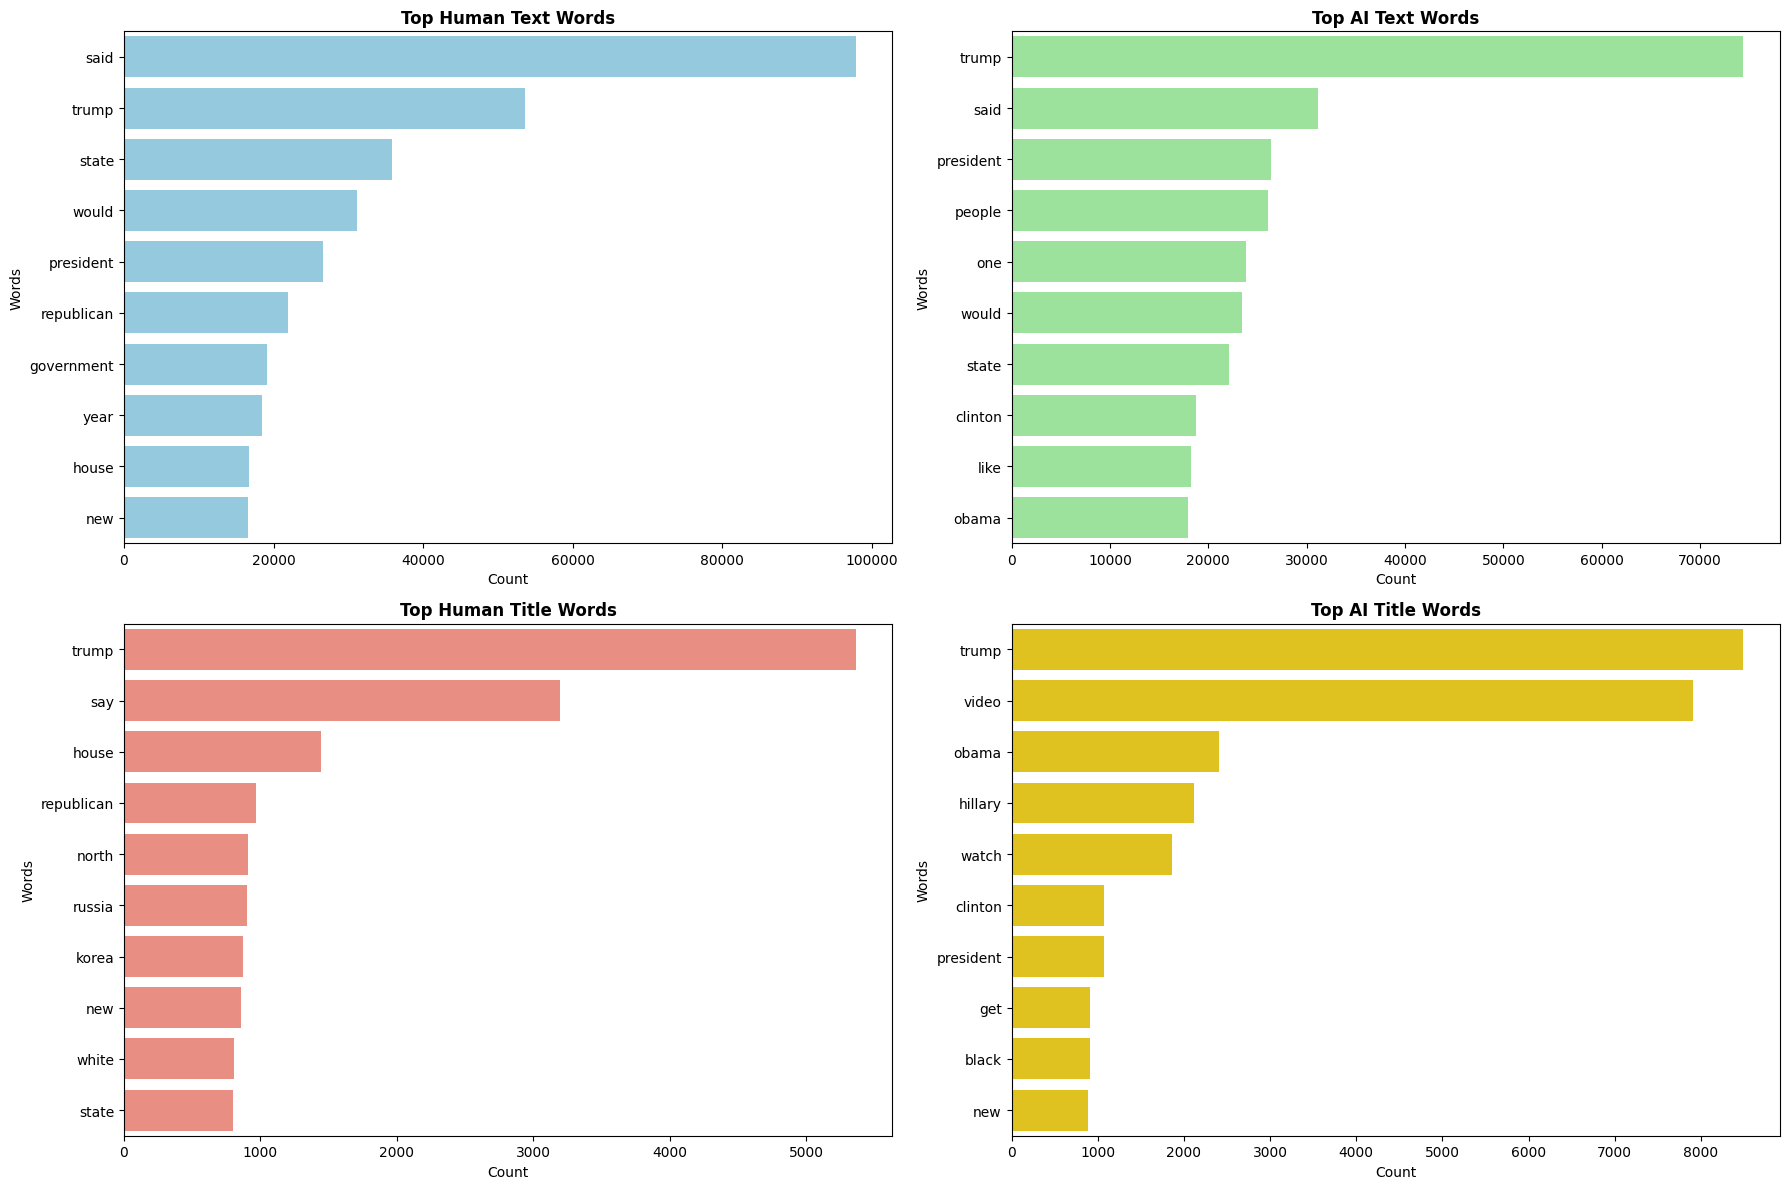

In [132]:
h_t_word, h_t_count = zip(*top_human_text_words)
a_t_word, a_t_count = zip(*top_ai_text_words)

h_tt_word, h_tt_count = zip(*top_human_title_words)
a_tt_word, a_tt_count = zip(*top_ai_title_words)



fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Human Text Words
sns.barplot(x=list(h_t_count), y=list(h_t_word), color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Top Human Text Words', fontweight='bold')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Words')

# AI Text Words
sns.barplot(x=list(a_t_count), y=list(a_t_word), color='lightgreen', ax=axs[0, 1])
axs[0, 1].set_title('Top AI Text Words', fontweight='bold')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('Words')

# Human Title Words
sns.barplot(x=list(h_tt_count), y=list(h_tt_word), color='salmon', ax=axs[1, 0])
axs[1, 0].set_title('Top Human Title Words', fontweight='bold')
axs[1, 0].set_xlabel('Count')
axs[1, 0].set_ylabel('Words')

# AI Title Words
sns.barplot(x=list(a_tt_count), y=list(a_tt_word), color='gold', ax=axs[1, 1])
axs[1, 1].set_title('Top AI Title Words', fontweight='bold')
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('Words')

plt.tight_layout()
plt.show()


**Human Text Words**

`Top Words:` "said," "trump," "state," "would," "president," "republican," "government," "year," "house," "new"

`Observation: `The most frequent words in human-generated news text are related to political figures and institutions, with "said" being the most common word, indicating a focus on quoting sources and reporting statements.


**AI Text Words**

`Top Words:` "trump," "said," "president," "people," "one," "would," "state," "clinton," "like," "obama"

`Observation:` AI-generated news text also frequently mentions political figures but includes more general terms like "people" and "one," suggesting a broader and more generalized approach to news content.

**Human Title Words**

`Top Words`: "trump," "say," "house," "republican," "north," "russia," "korea," "new," "white," "state"

`Observation:` Human-generated titles prominently feature political entities and geographic locations, with a clear focus on high-profile topics and events.

**AI Title Words**

`Top Words:` "trump," "video," "obama," "hillary," "watch," "clinton," "president," "get," "black," "new"

`Observation:` AI-generated titles emphasize popular and engaging content, with a notable presence of the word "video," indicating a preference for multimedia content to attract attention.

## Simple Sentiment Analysis

In [133]:
#using textblob lib
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_clean['text_sentiment'] = df_clean['clean_text'].apply(textblob_sentiment)
df_clean['title_sentiment'] = df_clean['clean_title'].apply(textblob_sentiment)

df_clean[['clean_text', 'text_sentiment', 'clean_title', 'title_sentiment']].head()


,clean_text,text_sentiment,clean_title,title_sentiment
0,washington head conservative republican factio...,0.027671,budget fight loom republican flip fiscal script,0.0
1,washington transgender people allowed first ti...,0.097088,military accept transgender recruit monday pen...,-0.1
2,washington special counsel investigation link ...,0.105132,senior republican senator mueller job,0.0
3,washington trump campaign adviser george papad...,0.031498,fbi russia probe helped australian diplomat nyt,0.0
4,president donald trump called postal service f...,0.032500,trump want postal service charge amazon shipment,0.0


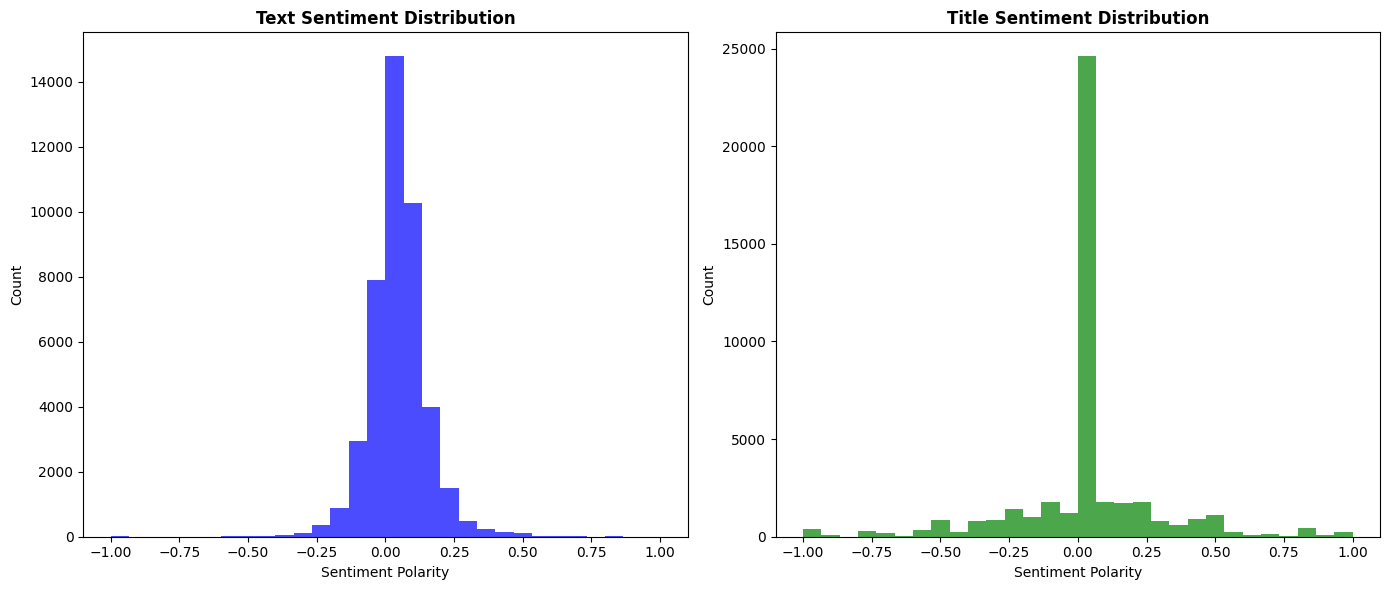

In [134]:
def plot_sentiment(df, text_sentiment, title_sentiment):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].hist(df[text_sentiment], bins=30, color='blue', alpha=0.7)
    ax[0].set_title('Text Sentiment Distribution', fontweight='bold')
    ax[0].set_xlabel('Sentiment Polarity')
    ax[0].set_ylabel('Count')
    
    ax[1].hist(df[title_sentiment], bins=30, color='green', alpha=0.7)
    ax[1].set_title('Title Sentiment Distribution', fontweight='bold')
    ax[1].set_xlabel('Sentiment Polarity')
    ax[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

plot_sentiment(df_clean, 'text_sentiment', 'title_sentiment')


`Text Sentiment Distribution (Left Plot):`

This histogram displays the distribution of sentiment polarity scores for the clean_text column. 
**Most sentiment scores appear to be clustered around 0**, 

indicating a generally neutral sentiment, with some spread towards positive and negative sentiments.

`Title Sentiment Distribution (Right Plot):`

This histogram shows the distribution of sentiment polarity scores for the clean_title column. 
**There is a strong spike at 0**, 
indicating that most titles have a neutral sentiment, with fewer instances of positive and negative sentiments.

## VADER Sentiment Analysis

In [135]:
sid = SentimentIntensityAnalyzer()

def sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

df_clean['text_vader_scores'] = df_clean['clean_text'].apply(sentiment_scores)
df_clean['title_vader_scores'] = df_clean['clean_title'].apply(sentiment_scores)

vader_df = pd.json_normalize(df_clean[['text_vader_scores', 'title_vader_scores']])
comb_df = pd.concat([df_clean, vader_df], axis=1)

In [136]:
comb_df[['text_neg', 'text_neu', 'text_pos', 'text_compound']] = pd.DataFrame(comb_df['text_vader_scores'].tolist(), index=comb_df.index)
comb_df[['title_neg', 'title_neu', 'title_pos', 'title_compound']] = pd.DataFrame(comb_df['title_vader_scores'].tolist(), index=comb_df.index)

comb_df

,title,text,subject,label,clean_title,clean_text,labelE,text_sentiment,title_sentiment,text_vader_scores,title_vader_scores,text_neg,text_neu,text_pos,text_compound,title_neg,title_neu,title_pos,title_compound
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,budget fight loom republican flip fiscal script,washington head conservative republican factio...,Human,0.027671,0.00,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.151, 'co...","{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp...",0.068,0.781,0.151,0.9880,0.474,0.526,0.000,-0.5423
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,military accept transgender recruit monday pen...,washington transgender people allowed first ti...,Human,0.097088,-0.10,"{'neg': 0.097, 'neu': 0.743, 'pos': 0.161, 'co...","{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.097,0.743,0.161,0.9509,0.000,0.658,0.342,0.3818
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,senior republican senator mueller job,washington special counsel investigation link ...,Human,0.105132,0.00,"{'neg': 0.078, 'neu': 0.832, 'pos': 0.09, 'com...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.078,0.832,0.090,0.0772,0.000,1.000,0.000,0.0000
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,fbi russia probe helped australian diplomat nyt,washington trump campaign adviser george papad...,Human,0.031498,0.00,"{'neg': 0.103, 'neu': 0.797, 'pos': 0.1, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.103,0.797,0.100,-0.1761,0.000,1.000,0.000,0.0000
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,trump want postal service charge amazon shipment,president donald trump called postal service f...,Human,0.032500,0.00,"{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...","{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.084,0.777,0.139,0.9698,0.000,0.625,0.375,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,mcpain john mccain furious iran treated u sail...,century wire say reported earlier week unlikel...,AI,0.027706,0.00,"{'neg': 0.169, 'neu': 0.649, 'pos': 0.181, 'co...","{'neg': 0.314, 'neu': 0.508, 'pos': 0.178, 'co...",0.169,0.649,0.181,0.6483,0.314,0.508,0.178,-0.3818
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,justice yahoo settle privacy lawyer user,century wire say familiar theme whenever dispu...,AI,0.113265,0.00,"{'neg': 0.112, 'neu': 0.784, 'pos': 0.104, 'co...","{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",0.112,0.784,0.104,-0.3182,0.000,0.595,0.405,0.5267
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,sunnistan u allied safe zone plan take territo...,patrick henningsen century wireremember obama ...,AI,0.059012,0.50,"{'neg': 0.16, 'neu': 0.683, 'pos': 0.157, 'com...","{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.160,0.683,0.157,-0.9938,0.000,0.756,0.244,0.4404
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,blow million al jazeera america finally call q...,century wire say al jazeera america go history...,AI,0.104054,0.00,"{'neg': 0.097, 'neu': 0.774, 'pos': 0.129, 'co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.097,0.774,0.129,0.8442,0.000,1.000,0.000,0.0000


In [137]:
comb_df = comb_df.drop(columns='text_vader_scores')
comb_df = comb_df.drop(columns='title_vader_scores')

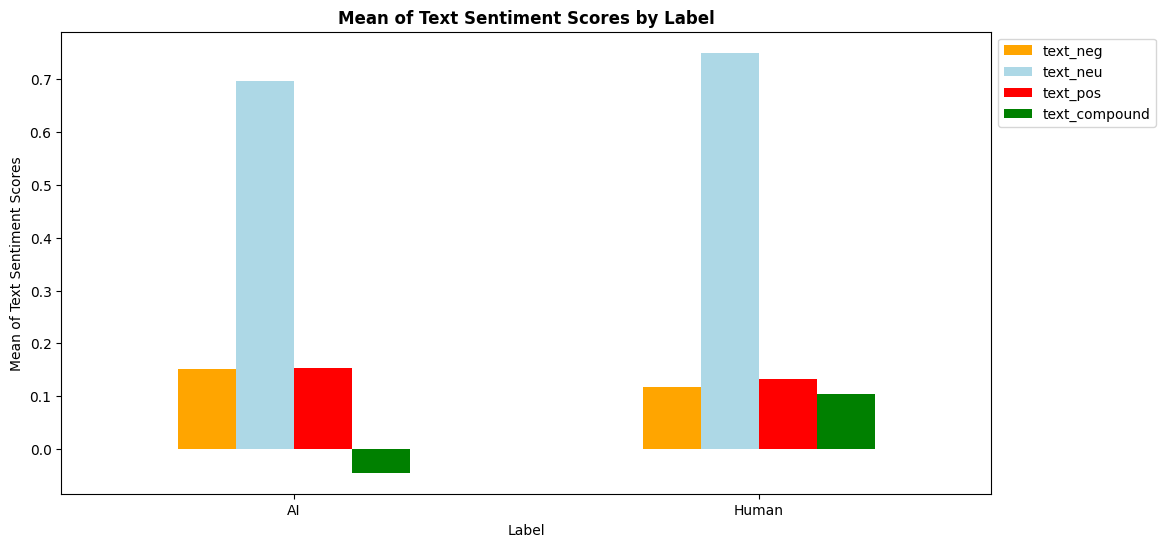

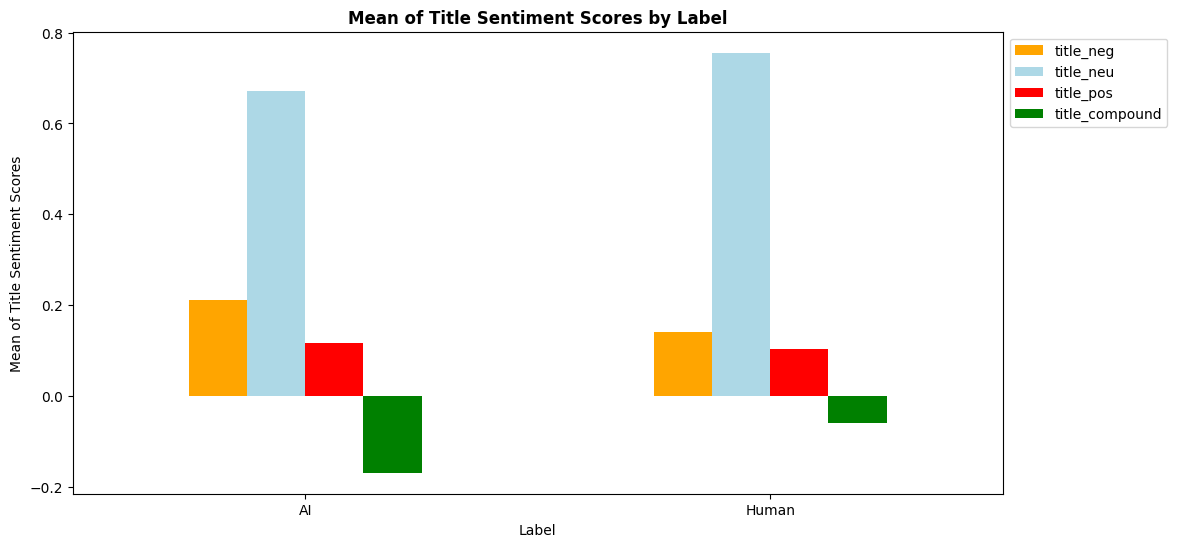

Mean Text Scores: 
        text_neg  text_neu  text_pos  text_compound
labelE                                             
AI      0.150533  0.696172  0.153292      -0.044942
Human   0.117333  0.750277  0.132388       0.103681


Mean Title Scores: 
        title_neg  title_neu  title_pos  title_compound
labelE                                                 
AI       0.211425   0.671298   0.117283       -0.169293
Human    0.141515   0.755800   0.102687       -0.059639


In [138]:
text_mean_vs = comb_df.groupby('labelE')[['text_neg', 'text_neu', 'text_pos', 'text_compound']].mean()
# text_std_vs = comb_df.groupby('labelE')[['text_neg', 'text_neu', 'text_pos', 'text_compound']].std()

title_mean_vs = comb_df.groupby('labelE')[['title_neg', 'title_neu', 'title_pos', 'title_compound']].mean()
# title_std_vs = comb_df.groupby('labelE')[['title_neg', 'title_neu', 'title_pos', 'title_compound']].std()

plt.figure(figsize=(12, 6))
text_mean_vs.plot(kind='bar', ax=plt.gca(), color=['orange', 'lightblue', 'red', 'green'])
plt.title('Mean of Text Sentiment Scores by Label', fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Mean of Text Sentiment Scores')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

# plt.figure(figsize=(12, 6))
# text_std_vs.plot(kind='bar', ax=plt.gca(), color=['orange', 'lightblue', 'red', 'green'])
# plt.title('Standard Deviation of Text Sentiment Scores by Label', fontweight='bold')
# plt.xlabel('Label')
# plt.ylabel('Standard Deviation of Text Sentiment Scores')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=0)
# plt.show()

# plt.figure(figsize=(12, 6))
# title_std_vs.plot(kind='bar', ax=plt.gca(), color=['orange', 'lightblue', 'red', 'green'])
# plt.title('Standard Deviation of Title Sentiment Scores by Label', fontweight='bold')
# plt.xlabel('Label')
# plt.ylabel('Standard Deviation of Title Sentiment Scores')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=0)
# plt.show()

plt.figure(figsize=(12, 6))
title_mean_vs.plot(kind='bar', ax=plt.gca(), color=['orange', 'lightblue', 'red', 'green'])
plt.title('Mean of Title Sentiment Scores by Label', fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Mean of Title Sentiment Scores')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

print(f'Mean Text Scores: \n{text_mean_vs}\n')
print('=========================================================\n')
print(f'Mean Title Scores: \n{title_mean_vs}')

### Analysis of Mean Sentiment Scores by Label

#### Mean of Text Sentiment Scores by Label:
1. **text_neg**:
   - AI: Approximately 0.15
   - Human: Approximately 0.10
   - **Observation**: AI texts have a slightly higher mean negative sentiment score compared to Human texts.

2. **text_neu**:
   - AI: Approximately 0.70
   - Human: Approximately 0.70
   - **Observation**: Both AI and Human texts have very similar mean neutral sentiment scores, with neutral sentiment being the most dominant sentiment for both.

3. **text_pos**:
   - AI: Approximately 0.10
   - Human: Approximately 0.12
   - **Observation**: Human texts have a slightly higher mean positive sentiment score compared to AI texts.

4. **text_compound**:
   - AI: Slightly negative
   - Human: Slightly positive
   - **Observation**: AI texts have a negative mean compound sentiment score, indicating overall negative sentiment, while Human texts have a positive mean compound sentiment score, indicating overall positive sentiment.

#### Mean of Title Sentiment Scores by Label:
1. **title_neg**:
   - AI: Approximately 0.25
   - Human: Approximately 0.15
   - **Observation**: AI titles have a higher mean negative sentiment score compared to Human titles.

2. **title_neu**:
   - AI: Approximately 0.65
   - Human: Approximately 0.65
   - **Observation**: Both AI and Human titles have very similar mean neutral sentiment scores, with neutral sentiment being the most dominant sentiment for both.

3. **title_pos**:
   - AI: Approximately 0.10
   - Human: Approximately 0.10
   - **Observation**: Both AI and Human titles have similar mean positive sentiment scores.

4. **title_compound**:
   - AI: Slightly negative
   - Human: Slightly positive
   - **Observation**: AI titles have a negative mean compound sentiment score, indicating overall negative sentiment, while Human titles have a positive mean compound sentiment score, indicating overall positive sentiment.

### Summary:
- **Neutral Sentiment**: Dominant in both text and title for both AI and Human labels.
- **Negative Sentiment**: Slightly higher in AI texts and titles compared to Human.
- **Positive Sentiment**: Slightly higher in Human texts compared to AI.
- **Compound Sentiment**: 
  - AI: Overall negative for both text and title.
  - Human: Overall positive for both text and title.
  

In [139]:
from scipy.stats import shapiro
import scipy.stats as stats

def check_normality(data, column_name, group_column):
    groups = data[group_column].unique()
    
    for group in groups:
        group_data = data[data[group_column] == group]
        stat, p = stats.shapiro(group_data[column_name])
        print(f'Group: {group}, Statistics={stat}, p={p}')
        if p > 0.05:
            print(f'{column_name} for {group} looks Gaussian (fail to reject H0)\n')
        else:
            print(f'{column_name} for {group} does not look Gaussian (reject H0)\n')


check_normality(comb_df, 'text_pos', 'labelE')
check_normality(comb_df, 'text_compound', 'labelE')

check_normality(comb_df, 'title_pos', 'labelE')
check_normality(comb_df, 'title_compound', 'labelE')


Group: Human, Statistics=0.9796605426355471, p=8.029083266671296e-47
text_pos for Human does not look Gaussian (reject H0)

Group: AI, Statistics=0.8852060942809197, p=8.85003927592446e-83
text_pos for AI does not look Gaussian (reject H0)

Group: Human, Statistics=0.8028999051581306, p=7.918445245053053e-94
text_compound for Human does not look Gaussian (reject H0)

Group: AI, Statistics=0.7861815358055367, p=1.2266940355396926e-97
text_compound for AI does not look Gaussian (reject H0)

Group: Human, Statistics=0.7006614809453954, p=2.759189340653954e-104
title_pos for Human does not look Gaussian (reject H0)

Group: AI, Statistics=0.7909539681056661, p=4.465100195701849e-97
title_pos for AI does not look Gaussian (reject H0)

Group: Human, Statistics=0.957769331476779, p=3.9357394449769266e-60
title_compound for Human does not look Gaussian (reject H0)

Group: AI, Statistics=0.9603713282222384, p=2.8689804341294206e-60
title_compound for AI does not look Gaussian (reject H0)



c:\Users\GGPC\IoD_Mini_Projects\IoD_Env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21210.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\GGPC\IoD_Mini_Projects\IoD_Env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22847.
  res = hypotest_fun_out(*samples, **kwds)


Only run below if you want to see the distribution
they are not gaussian.

In [140]:
# plt.figure(figsize=(12, 6))
# sns.histplot(comb_df[comb_df['labelE'] == 'Human']['text_compound'], color='blue', label='Real', kde=True, alpha=0.4)
# sns.histplot(comb_df[comb_df['labelE'] == 'AI']['text_compound'], color='red', label='Fake', kde=True, alpha=0.4)
# plt.title('Distribution of Compound Sentiment Scores')
# plt.xlabel('Compound Sentiment Score')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.histplot(comb_df[comb_df['labelE'] == 'Human']['title_compound'], color='blue', label='Real', kde=True, alpha=0.4)
# sns.histplot(comb_df[comb_df['labelE'] == 'AI']['title_compound'], color='red', label='Fake', kde=True, alpha=0.4)
# plt.title('Distribution of Compound Sentiment Scores')
# plt.xlabel('Compound Sentiment Score')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.histplot(comb_df[comb_df['labelE'] == 'Human']['text_pos'], color='blue', label='Real', kde=True, alpha=0.4)
# sns.histplot(comb_df[comb_df['labelE'] == 'AI']['text_pos'], color='red', label='Fake', kde=True, alpha=0.4)
# plt.title('Distribution of Positive Sentiment Scores')
# plt.xlabel('Positive Sentiment Score')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.histplot(comb_df[comb_df['labelE'] == 'Human']['title_pos'], color='blue', label='Real', kde=True, alpha=0.4)
# sns.histplot(comb_df[comb_df['labelE'] == 'AI']['title_pos'], color='red', label='Fake', kde=True, alpha=0.4)
# plt.title('Distribution of Positive Sentiment Scores')
# plt.xlabel('Positive Sentiment Score')
# plt.legend()
# plt.show()

## Mann-Whitney U Test


## Hypothesis Statements

`Null Hypothesis (H0):`There is no significant difference between AI generated articles and Human written articles.

`Alternative Hypothesis (H1):` There is a significant difference between AI generated articles and Human written articles.

In [141]:
from scipy.stats import mannwhitneyu

def mannwhitneyu_test(data, column_name, group_column):
    group1 = data[data[group_column] == 'AI'][column_name]
    group2 = data[data[group_column] == 'Human'][column_name]
    
    stat, p = mannwhitneyu(group1, group2)
    print(f'Mann-Whitney U Test for {column_name}')
    print(f'Statistics={stat}, p={p}')
    
    if p > 0.05:
        print(f'Fail to reject H0: Distributions of {column_name} are similar')
    else:
        print(f'Reject H0: Distributions of {column_name} are different')
        
    print('------------------------------------------------------')
    print('------------------------------------------------------')
    
#performing test

mannwhitneyu_test(comb_df, 'text_compound', 'labelE')
mannwhitneyu_test(comb_df, 'title_compound', 'labelE')

mannwhitneyu_test(comb_df, 'text_pos', 'labelE')
mannwhitneyu_test(comb_df, 'title_pos', 'labelE')

Mann-Whitney U Test for text_compound
Statistics=217238152.5, p=1.0309591591333293e-78
Reject H0: Distributions of text_compound are different
------------------------------------------------------
------------------------------------------------------
Mann-Whitney U Test for title_compound
Statistics=203474370.0, p=1.1421568000899355e-189
Reject H0: Distributions of title_compound are different
------------------------------------------------------
------------------------------------------------------
Mann-Whitney U Test for text_pos
Statistics=280891757.5, p=3.867038350587865e-184
Reject H0: Distributions of text_pos are different
------------------------------------------------------
------------------------------------------------------
Mann-Whitney U Test for title_pos
Statistics=261765750.5, p=4.33788269474753e-60
Reject H0: Distributions of title_pos are different
------------------------------------------------------
------------------------------------------------------


### Simplified Explanation

### Mann-Whitney U Test for `text_compound`:
- **U Statistic**: 217238152.5
  - The U statistic represents the sum of the ranks for one of the groups (AI or Human). A high U value suggests that one group's ranks are generally higher than the other group's.
- **p-value**: 1.0309591591333293e-78
  - Extremely low, indicating a significant difference.
- **Conclusion**: 
  - Reject H0.
  - AI and Human distributions for `text_compound` are significantly different.

### Mann-Whitney U Test for `title_compound`:
- **U Statistic**: 203474370.0
  - A high U value indicates a substantial difference in the rank sums between the two groups.
- **p-value**: 1.1421568000899355e-189
  - Extremely low, indicating a significant difference.
- **Conclusion**: 
  - Reject H0.
  - AI and Human distributions for `title_compound` are significantly different.

### Mann-Whitney U Test for `text_pos`:
- **U Statistic**: 280891757.5
  - A high U value suggests a notable difference in the rank sums between the two groups.
- **p-value**: 3.867038350587865e-184
  - Extremely low, indicating a significant difference.
- **Conclusion**: 
  - Reject H0.
  - AI and Human distributions for `text_pos` are significantly different.

### Mann-Whitney U Test for `title_pos`:
- **U Statistic**: 261765750.5
  - A high U value shows a considerable difference in the rank sums between the two groups.
- **p-value**: 4.33788269474753e-60
  - Extremely low, indicating a significant difference.
- **Conclusion**: 
  - Reject H0.
  - AI and Human distributions for `title_pos` are significantly different.

### Summary of Findings:
- **Overall**:
  - For all sentiment scores (`text_compound`, `title_compound`, `text_pos`, `title_pos`), the p-values are extremely low.
  - Reject H0 for all tests.
  - Significant differences in sentiment distributions between AI and Human labels.
  - High U statistics indicate substantial differences in the ranks between the two groups, showing that the sentiment scores for AI and Human texts are different.

### Key Points:
- **U Statistic**: Measures the rank sums for one group.
- **High U Value**: Indicates a significant difference in ranks between the two groups.
- **p-value**: Low p-values confirm the differences are statistically significant.
- **Conclusion**: There are significant differences in the sentiment scores between AI and Human texts.
